In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("Cust_Segmentation.csv")

In [4]:
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
Address            850 non-null object
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [6]:
data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


From the table above it can be observed that there are no outliers in the columns of interest i.e Age,Years Employed and DebtIncomeRatio

Note: Debt-Income-Ratio is all your monthly debt payments divided by your gross monthly income.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


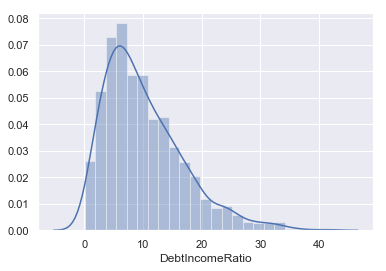

In [22]:
sns.distplot(data["DebtIncomeRatio"])

Debt Income Ratio forms a distribution plot with a skew to the right..so it isn't a perfect normal distribution

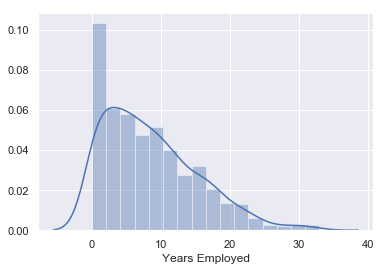

In [23]:
sns.distplot(data["Years Employed"])

Years employed also forms a distribution plot with a skew to the right indicating the presence of more customers with relatively higher number of years employed..so it isn't a perfect normal distribution

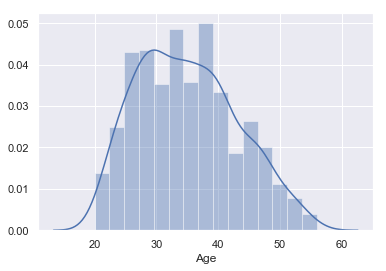

In [24]:
sns.distplot(data["Age"])

AGE SEEMS TO BE A NORMALLY DISTRIBUTED VARIABLE.

# First, we will work with Debt-Income-Ratio and Years Employed using KMeans Clustering

In [7]:
from sklearn.cluster import KMeans

In [9]:
x1 = data.iloc[:,[3,-1]]

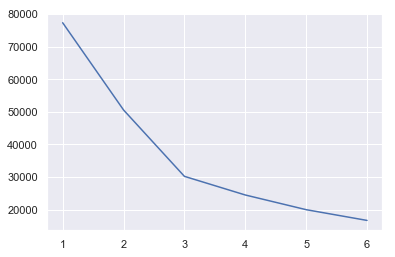

In [11]:
wcss1 =[]
for i in range(1,7):
    kmeans_years = KMeans(i,init='k-means++')
    kmeans_years.fit(x1)
    wcss_iter = kmeans_years.inertia_
    wcss1.append(wcss_iter)
number_clusters=[i for i in range(1,7)]
plt.plot(number_clusters,wcss1)

Optimal number of clusters is 3

In [35]:
kmeans_years_opt = KMeans(3)
years_kcluster = kmeans_years_opt.fit_predict(x1)

In [36]:
data_copy = data.copy()

In [37]:
data_copy["years_kcluster"] = years_kcluster

Text(0, 0.5, 'Debt-IncomeRatio')

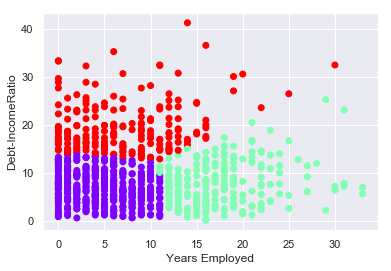

In [38]:
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c= data_copy["years_kcluster"],cmap ="rainbow")
plt.xlabel("Years Employed")
plt.ylabel("Debt-IncomeRatio")

FROM THE PLOT ABOVE, THE DATASET WAS CLUSTERED INTO 3 CATEGORIES..THE FIRST CATEGORY CONSISTS OF CUSTOMERS WITH LESS THAN 12 YEARS OF EMPLOYMENT AND RELATIVELY LOW DEBT/INCOME RATIO. THIS MAY REFER TO YOUNGER PEOPLE WITH HIGH PAYING JOBS.THE SECOND CATEGORY  CONSISTS OF CUSTOMERS WITH MORE THAN 12 YEARS OF EMPLOYMENT AND RELATIVELY LOW DEBT INCOME RATIO.THIS IS EXPECTED FOR PEOPLE WHO HAVE SPENT A LOT OF YEARS WORKING AND PROBABLY INVESTING AND SO HAVE A HIGHER INCOME.

THE LAST CATEGORY CONSISTS OF CUSTOMERS WITH RELATIVELY HIGHER DEBT-INCOME RATIO I.E HIGHER THAN 12 WITH MOST OF THEM BELOW 15 YEARS OF EMPLOYMENT.THIS IS MAY CONSIST OF CUSTOMERS WITH MEDIUM-PAY JOBS.

# NOW WE WILL TRY TO USE HIERARCHIAL CLUSTERING TO ACHIEVE THE SAME RESULT

In [26]:
import scipy.cluster.hierarchy as sch

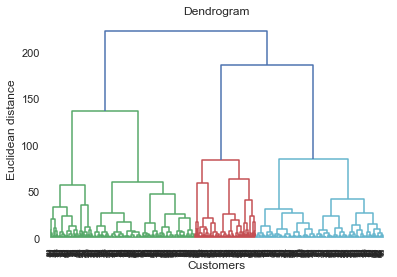

In [41]:
dendrogram1 = sch.dendrogram(sch.linkage(x1,method ="ward"))
plt.title("Dendrogram")
plt.ylabel("Euclidean distance")
plt.xlabel("Customers")
plt.show()

THE LONGEST VERTICAL LINE THAT CAN BE SPOTTED WITHOUT ANY BREAKING HORIZONTAL LINE HAS 3 OTHER VERTICAL LINES IN ITS SPACE

SO THE OPTIMAL NUMBER OF CLUSTERS IS 3

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
hc = AgglomerativeClustering(n_clusters = 3,affinity ="euclidean",linkage ="ward")

In [46]:
years_hc = hc.fit_predict(x1)

In [47]:
data_copy_2 = data.copy()

In [49]:
data_copy_2["years_hc"] = years_hc

Text(0, 0.5, 'Debt-IncomeRatio')

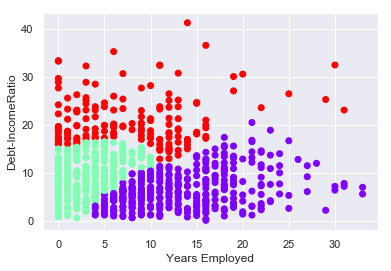

In [50]:
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c= data_copy_2["years_hc"],cmap ="rainbow")
plt.xlabel("Years Employed")
plt.ylabel("Debt-IncomeRatio")

A SIMILAR OBSERVATION AS IN KMEANS IS OBSERVED..BUT IN THIS CASE..THE FIRST CATEGORY SPANS A SMALLER RANGE IN THAT MOST OF THE CUSTOMERS IN THAT RANGE HAVE A DEBT-INCOME RATIO ABOVE 5 COMPARED TO THE FIRST CASE. ALSO, THE 2ND CATEGORY SPANS A LARGER RANGE OF YEARS EMPLOYED..COMPARED TO KMEANS

THE KMEANS CLUSTER LOOKS BETTER OVERALL

# FOR DEBT-INCOME RATIO AND AGE KMEANS

In [51]:
x2 = data.iloc[:,[1,-1]]

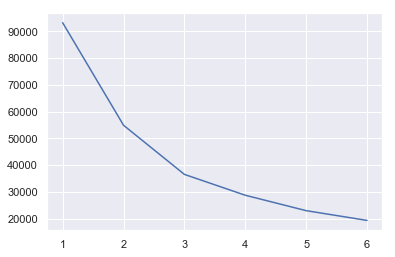

In [54]:
wcss2 =[]
for i in range(1,7):
    kmeans_age = KMeans(i,init='k-means++')
    kmeans_age.fit(x2)
    wcss_iter = kmeans_age.inertia_
    wcss2.append(wcss_iter)
number_clusters=[i for i in range(1,7)]
plt.plot(number_clusters,wcss2)

OPTIMAL NO OF CLUSTERS IS 3

In [69]:
kmeans_age_opt = KMeans(3)
age_kcluster = kmeans_age_opt.fit_predict(x2)

In [70]:
data_copy_3 = data.copy()

In [71]:
data_copy_3["age_kcluster"] = age_kcluster

Text(0, 0.5, 'Debt-IncomeRatio')

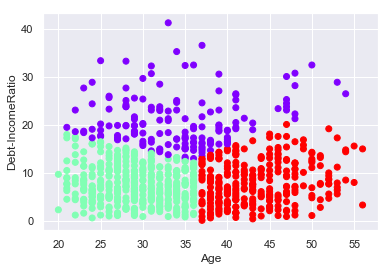

In [72]:
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c= data_copy_3["age_kcluster"],cmap ="rainbow")
plt.xlabel("Age")
plt.ylabel("Debt-IncomeRatio")

THE PLOT ABOVE IS SPLIT INTO 3 CATEGORIES..THE FIRST CONSISTS OF YOUNGER CUSTOMERS I.E BELOW 36 YRS WITH RELATIVELY LOW DEBT-INCOME RATIO.THIS SECTION MIGHT INVOLVE YOUNG CUSTOMERS WITH HIGH PAYING JOB E.G SOFTWARE DEVELOPERS..YOUNG CEOs...THE 2ND CATEGORY CONSISTS OF OLDER CUSTOMERS WITH RELATIVELY LOW DEBT-INCOME RATIO I.E BELOW 20%..THIS MIGHT INCLUDE OLDER CUSTOMERS WITH MORE WORKING YEARS AND PROBABLY MORE SAVINGS AND IN SOME CASES WITH JOBS NOT AS HIGH PAYING AS THE FIRST CATEGORY DEPENDING ON THE NUMBER OF YEARS THEY HAVE BEEN WORKING..THE LAST CATEGORY INVOLVES CUSTOMERS WITH RELATIVELY HIGHER DEBT INCOME RATIO WITH A RELATIVELY WIDER AGE RANGE.THIS MAY INVOLVE CUSTOMERS WITH LOWER PAYING JOBS OR WHO SPEND ON UNNECESSARY THINGS.

# NOW WE WILL TRY TO USE HIERARCHIAL CLUSTERING TO ACHIEVE THE SAME RESULT

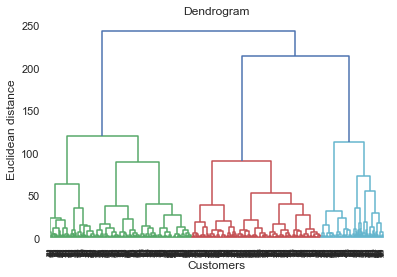

In [73]:
dendrogram2 = sch.dendrogram(sch.linkage(x2,method ="ward"))
plt.title("Dendrogram")
plt.ylabel("Euclidean distance")
plt.xlabel("Customers")
plt.show()

THE LONGEST VERTICAL LINE THAT CAN BE SPOTTED WITHOUT ANY BREAKING HORIZONTAL LINE HAS 3 OTHER VERTICAL LINES IN ITS SPACE

SO THE OPTIMAL NUMBER OF CLUSTERS IS 3

In [ ]:
hc2 = AgglomerativeClustering(n_clusters = 3,affinity ="euclidean",linkage ="ward")

In [74]:
age_hc = hc.fit_predict(x2)

In [75]:
data_copy_4 = data.copy()

In [76]:
data_copy_4["age_hc"] = age_hc

Text(0, 0.5, 'Debt-IncomeRatio')

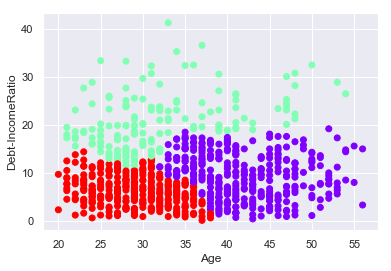

In [78]:
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c= data_copy_4["age_hc"],cmap ="rainbow")
plt.xlabel("Age")
plt.ylabel("Debt-IncomeRatio")

THE PLOT DERIVED WITH THE AID OF THE HIERARCHIAL CLUSTERING IS SIMILAR TO THAT OF KMEANS..WITH THE FIRST CATEGORY I.E THAT OF THE YOUNGER CUSTOMERS WITH RELATIVELY LOWER DEBT-INCOME RATIO BEING SLIGHTLY SMALLER IN SIZE AND THE 2ND CATEGORY I.E OLDER CUSTOMERS WITH RELATIVELY LOWER DEBT-INCOME RATIO BEING SLIGHLY LARGER IN SIZE

ONCE AGAIN, THE KMEANS MODEL IS PREFERRED!!

ValueError: could not convert string to float: 'NBA001'

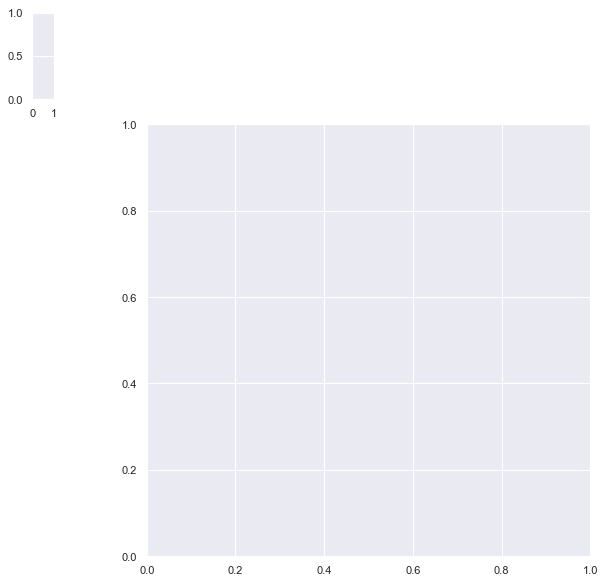

In [3]:
sns.clustermap(data)